In [23]:
import os
import sys
sys.path.append(os.path.abspath('../'))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import neural_lam.utils as utils
from neural_lam.constants import ERA5UKConstants

In [24]:
rmse_path = "../wandb/offline-run-20240606_192525-fd22zwlj/files/test_rmse.csv"

val_rmse = np.loadtxt(rmse_path, delimiter=',').T
print(val_rmse.shape)

(48, 28)


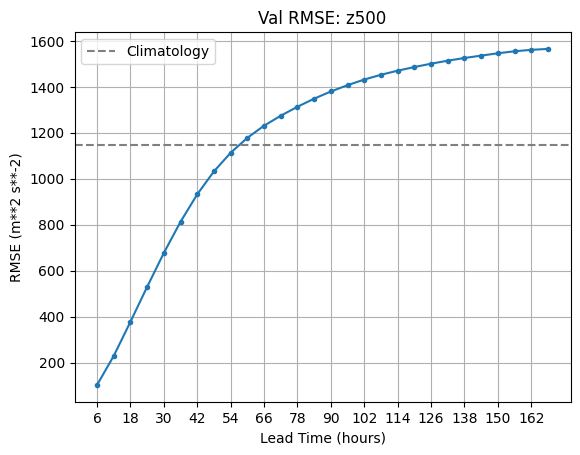

In [55]:
var_name = "z500"
var_idx = ERA5UKConstants.PARAM_NAMES.index(var_name)
var_clim = ERA5UKConstants.CLIMATOLOGY[var_name]
var_unit = ERA5UKConstants.PARAM_UNITS[var_idx]

fig, ax = plt.subplots()
ax.plot(val_rmse[var_idx], ".-", label=f"")
ax.axhline(var_clim, color="grey", linestyle="--", label="Climatology")

xticks_pos = range(0, val_rmse.shape[1], 2)
xticks_labels = [str((tick + 1) * 6) for tick in xticks_pos]
ax.set_xticks(xticks_pos)
ax.set_xticklabels(xticks_labels)

ax.legend()
ax.set_xlabel("Lead Time (hours)")
ax.set_ylabel(f"RMSE ({var_unit})")
ax.set_title(f"Val RMSE: {var_name}")
ax.grid(True)

## Plotting z on all levels

Text(0, 0.5, 'RMSE (m**2 s**-2)')

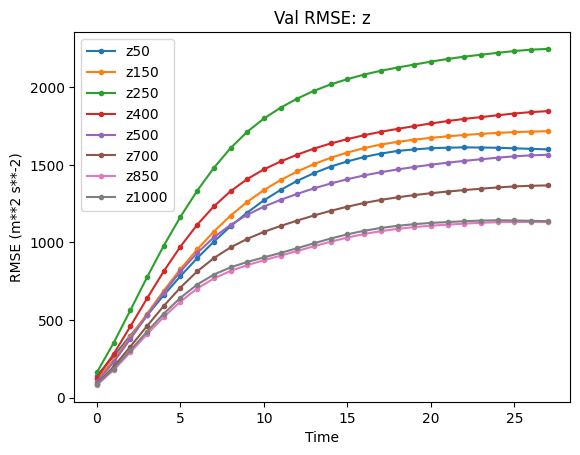

In [40]:
fig, ax = plt.subplots()
var_idx = 0
var_unit = ERA5UKConstants.PARAM_UNITS[var_idx]

ax.set_title(f"Val RMSE: z")

for var_idx in range(8):
    var_name = ERA5UKConstants.PARAM_NAMES[var_idx]
    ax.plot(val_rmse[var_idx], ".-", label=var_name)
    
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel(f"RMSE ({var_unit})")